###### --------Diabetes Prediction--------


### Library importing

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

## Loading and Reviewing the Data

In [3]:
data_frame = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\code 1\7th_sem_project\pimadataorig.csv")


In [4]:
data_frame.shape


(768, 9)

In [5]:
data_frame.head(5)


num_preg  glucose_conc  diastolic_bp  skin_thickness  insulin   bmi  \
0         6           148            72              35        0  33.6   
1         1            85            66              29        0  26.6   
2         8           183            64               0        0  23.3   
3         1            89            66              23       94  28.1   
4         0           137            40              35      168  43.1   

   diab_pred  age  diabetes  
0      0.627   50         1  
1      0.351   31         0  
2      0.672   32         1  
3      0.167   21         0  
4      2.288   33         1

In [6]:
data_frame.tail(5)


num_preg  glucose_conc  diastolic_bp  skin_thickness  insulin   bmi  \
763        10           101            76              48      180  32.9   
764         2           122            70              27        0  36.8   
765         5           121            72              23      112  26.2   
766         1           126            60               0        0  30.1   
767         1            93            70              31        0  30.4   

     diab_pred  age  diabetes  
763      0.171   63         0  
764      0.340   27         0  
765      0.245   30         0  
766      0.349   47         1  
767      0.315   23         0

# Definition of features




## Feature------> Description
###### num_preg-----------> number of pregnancies
###### glucose_conc------> Plasma glucose concentration a 2 hours in an oral glucose tolerance test
###### diastolic_bp--------> Diastolic blood pressure (mm Hg)
###### thickness-----------> Triceps skin fold thickness (mm)
###### insulin---------------> 2-Hour serum insulin (mu U/ml)
###### bmi-------------------> Body mass index (weight in kg/(height in m)A2)
###### diab_pred----------> Diabetes pedigree function
###### Age (years)--------> Age (years)
###### skin------------------> ?????
###### diabetes------------> Class variable (1=True, 0=False)


# Check for null values

In [7]:
print (data_frame.isnull().values.any())


False


In [11]:
data_frame.corr()

num_preg  glucose_conc  diastolic_bp  skin_thickness  \
num_preg        1.000000      0.129459      0.141282       -0.081672   
glucose_conc    0.129459      1.000000      0.152590        0.057328   
diastolic_bp    0.141282      0.152590      1.000000        0.207371   
skin_thickness -0.081672      0.057328      0.207371        1.000000   
insulin        -0.073535      0.331357      0.088933        0.436783   
bmi             0.017683      0.221071      0.281805        0.392573   
diab_pred      -0.033523      0.137337      0.041265        0.183928   
age             0.544341      0.263514      0.239528       -0.113970   
diabetes        0.221898      0.466581      0.065068        0.074752   

                 insulin       bmi  diab_pred       age  diabetes  
num_preg       -0.073535  0.017683  -0.033523  0.544341  0.221898  
glucose_conc    0.331357  0.221071   0.137337  0.263514  0.466581  
diastolic_bp    0.088933  0.281805   0.041265  0.239528  0.065068  
skin_thickness  0.436783  0.392573   0.183928 -0.113970  0.074752  
insulin         1.000000  0.197859   0.185071 -0.042163  0.130548  
bmi             0.197859  1.000000   0.140647  0.036242  0.292695  
diab_pred       0.185071  0.140647   1.000000  0.033561  0.173844  
age            -0.042163  0.036242   0.033561  1.000000  0.238356  
diabetes        0.130548  0.292695   0.173844  0.238356  1.000000

# Check for duplicate values

In [12]:
data_frame.duplicated().sum()

0

# Check overall values

In [14]:
data_frame.value_counts()

num_preg  glucose_conc  diastolic_bp  skin_thickness  insulin  bmi   diab_pred  age  diabetes
0         57            60            0               0        21.7  0.735      67   0           1
          67            76            0               0        45.3  0.194      46   0           1
5         103           108           37              0        39.2  0.305      65   0           1
          104           74            0               0        28.8  0.153      48   0           1
          105           72            29              325      36.9  0.159      28   0           1
                                                                                                ..
2         84            50            23              76       30.4  0.968      21   0           1
          85            65            0               0        39.6  0.930      27   0           1
          87            0             23              0        28.9  0.773      25   0           1
               

# Check all values

In [21]:
for i in data_frame.columns:
    print(f"All values for {i}")
    print(data_frame[i].value_counts())
    

All values for num_preg
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: num_preg, dtype: int64
All values for glucose_conc
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: glucose_conc, Length: 136, dtype: int64
All values for diastolic_bp
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: diastolic_bp, dtype: int64
All values for skin_thickness
0     227
32     31
30     27
27

In [22]:

data_frame.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [23]:
data_frame.describe()

num_preg  glucose_conc  diastolic_bp  skin_thickness     insulin  \
count  768.000000    768.000000    768.000000      768.000000  768.000000   
mean     3.845052    120.894531     69.105469       20.536458   79.799479   
std      3.369578     31.972618     19.355807       15.952218  115.244002   
min      0.000000      0.000000      0.000000        0.000000    0.000000   
25%      1.000000     99.000000     62.000000        0.000000    0.000000   
50%      3.000000    117.000000     72.000000       23.000000   30.500000   
75%      6.000000    140.250000     80.000000       32.000000  127.250000   
max     17.000000    199.000000    122.000000       99.000000  846.000000   

              bmi   diab_pred         age    diabetes  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

###### From above describetion we saw that    
###### bmi,insulin,skin_thickness,diastolic_bp,glucose_conc min value is 0.0 which is impossible so we will replace those values with their mean values

In [25]:
mean_col=["bmi","insulin","skin_thickness","diastolic_bp","glucose_conc"]
for i in mean_col:
    mean_value=data_frame[i].mean()
    data_frame[i]=data_frame[i].replace(0,mean_value)

In [26]:
data_frame.describe()

num_preg  glucose_conc  diastolic_bp  skin_thickness     insulin  \
count  768.000000    768.000000    768.000000      768.000000  768.000000   
mean     3.845052    121.681605     72.254807       26.606479  118.660163   
std      3.369578     30.436016     12.115932        9.631241   93.080358   
min      0.000000     44.000000     24.000000        7.000000   14.000000   
25%      1.000000     99.750000     64.000000       20.536458   79.799479   
50%      3.000000    117.000000     72.000000       23.000000   79.799479   
75%      6.000000    140.250000     80.000000       32.000000  127.250000   
max     17.000000    199.000000    122.000000       99.000000  846.000000   

              bmi   diab_pred         age    diabetes  
count  768.000000  768.000000  768.000000  768.000000  
mean    32.450805    0.471876   33.240885    0.348958  
std      6.875374    0.331329   11.760232    0.476951  
min     18.200000    0.078000   21.000000    0.000000  
25%     27.500000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

In [27]:
   data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_preg        768 non-null    int64  
 1   glucose_conc    768 non-null    float64
 2   diastolic_bp    768 non-null    float64
 3   skin_thickness  768 non-null    float64
 4   insulin         768 non-null    float64
 5   bmi             768 non-null    float64
 6   diab_pred       768 non-null    float64
 7   age             768 non-null    int64  
 8   diabetes        768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#### Checking the count of value 0 in the variables

In [28]:
variables = ['glucose_conc','diastolic_bp','skin_thickness','insulin','bmi','diab_pred','age',]
for i in variables:
    c = 0
    for x in (data_frame[i]):
        if x == 0:
            c = c + 1
    print(i,c)

glucose_conc 0
diastolic_bp 0
skin_thickness 0
insulin 0
bmi 0
diab_pred 0
age 0


# Exploratory Data Analysis

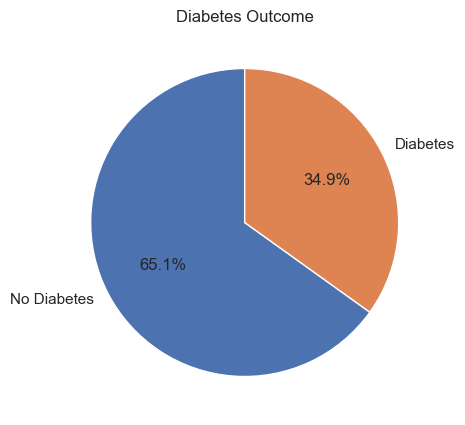

In [34]:
plt.figure(figsize=(5,5))
plt.pie(data_frame['diabetes'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Diabetes Outcome')
plt.show()

# Age Distribution and Diabetes

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


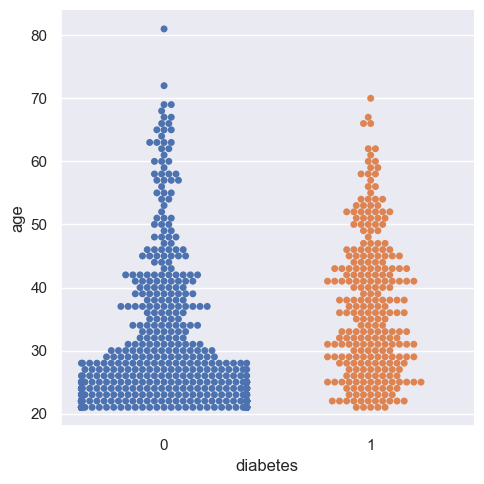

In [35]:
sns.catplot(x="diabetes", y="age", kind="swarm", data=data_frame)


###### From the graph, it is quite clear that majority of the patients are adult within the age group of 20-30 years. Patients in the age range 40-55 years are more prone to diabetes, as compared to other age groups. Since the number adults in the age group 20-30 years is more, the number of patients with diabetes is also more as compared of other age groups.

# Pregnancies and Diabetes

<AxesSubplot:xlabel='diabetes', ylabel='num_preg'>

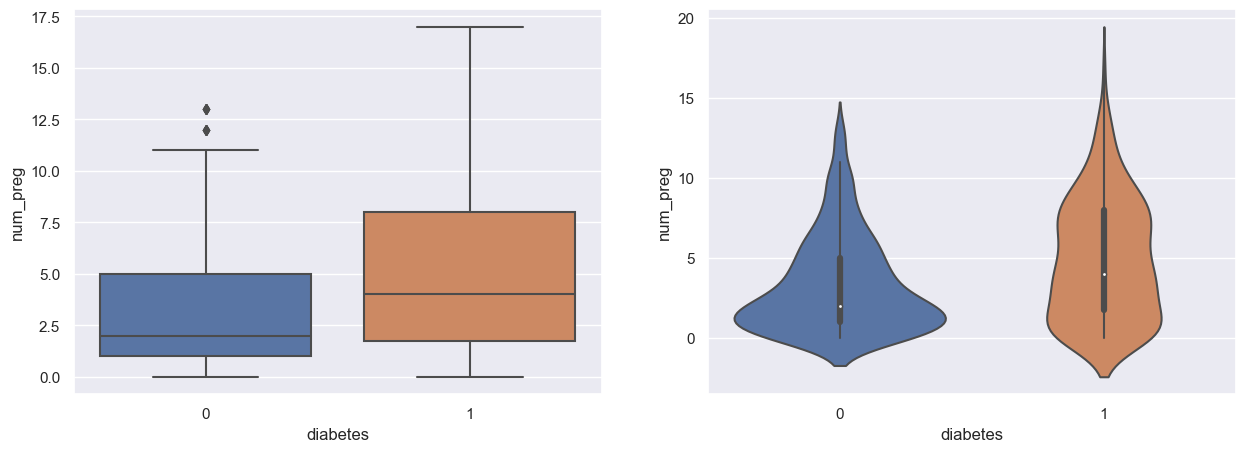

In [36]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='diabetes',y='num_preg',data=data_frame,ax=ax[0])
sns.violinplot(x='diabetes',y='num_preg',data=data_frame,ax=ax[1])

###### Both boxplot and violinplot shows strange relation between the number of preganacies and diabetes. According to the graphs the increased number of pregnancies highlights increased risk of diabetes.

# Glucose and Diabetes

Text(0.5, 1.0, 'Glucose vs Diabetes')

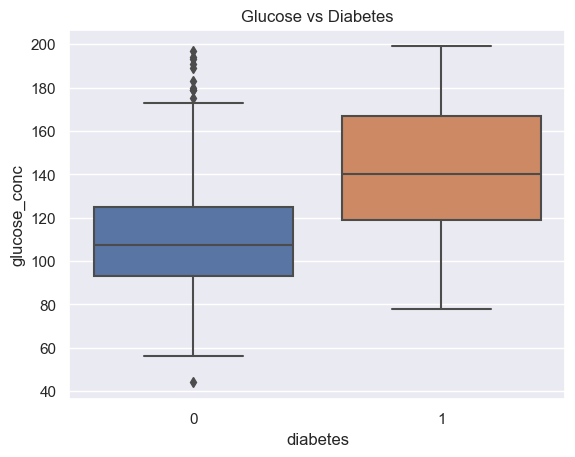

In [37]:
sns.boxplot(x='diabetes', y='glucose_conc', data=data_frame).set_title('Glucose vs Diabetes')


###### Glucose level plays a major role in determine whether the patient is diabetic or not. The patients with median gluocse level less than 120 are more likely to be non-diabetic. The patients with median gluocse level greather than 140 are more likely to be diabetic. Therefore, high gluocose levels is a good indicator of diabetes.

# Blood Pressuse and Diabetes


Text(0.5, 1.0, 'BloodPressure vs Diabetes')

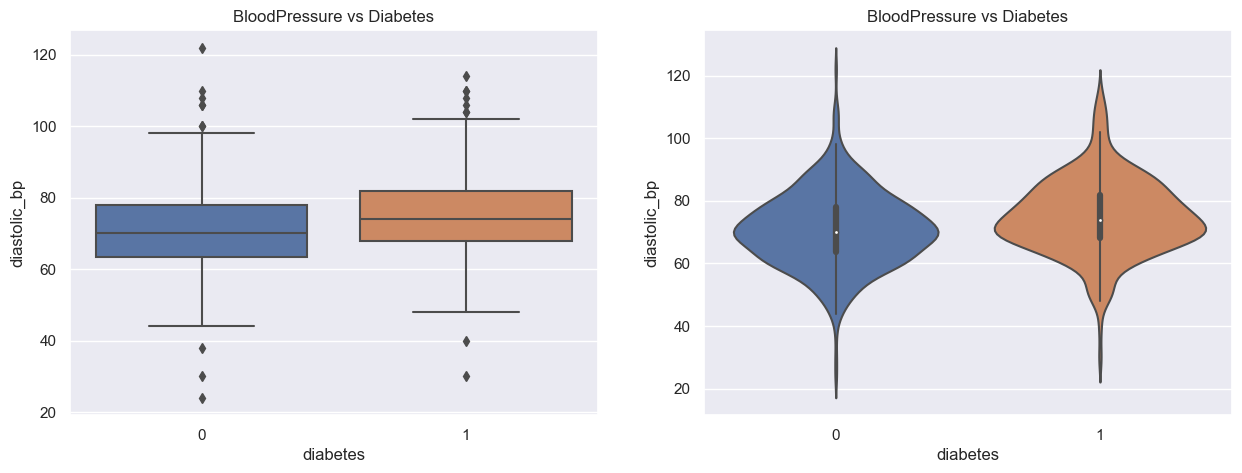

In [39]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='diabetes', y='diastolic_bp', data=data_frame, ax=ax[0]).set_title('BloodPressure vs Diabetes')
sns.violinplot(x='diabetes', y='diastolic_bp', data=data_frame, ax=ax[1]).set_title('BloodPressure vs Diabetes')

###### Both the boxplot and voilinplot provides clear understanding of the realtion between the blood pressure and diabetes. The boxplot shows that the median of the blood pressure for the diabetic patients is slightly higher than the non-diabetic patients. The voilinplot shows that the distribution of the blood pressure for the diabetic patients is slightly higher than the non-diabetic patients. But there has been not enough evidence to conclude that the blood pressure is a good predictor of diabetes.

# Skin Thickness and Diabetes

Text(0.5, 1.0, 'SkinThickness vs Diabetes')

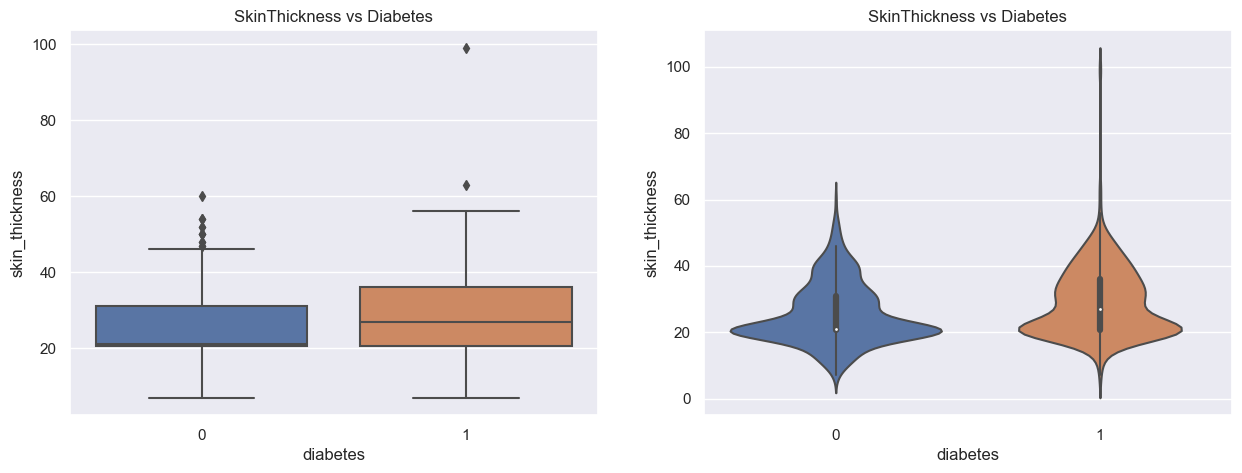

In [40]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='diabetes', y='skin_thickness', data=data_frame,ax=ax[0]).set_title('SkinThickness vs Diabetes')
sns.violinplot(x='diabetes', y='skin_thickness', data=data_frame,ax=ax[1]).set_title('SkinThickness vs Diabetes')

###### Here both the boxplot and violinplot reveals the effect of diabetes on skin thickness. As obserevd in the boxplot, the median of skin thickness is higher for the diabetic patients than the non-diabetic patients, where non diabetic patients have median skin thickness near 20 in comparison to skin thickness nearly 30 in diabetic patients. The voilinpplot shows the distribution of patients' skin thickness amoung the patients, where the non diabetic ones have greater distribution near 20 and diabetic much less distribution near 20 and increased distribution near 30. Therefore, skin thickness can be a indicator of diabetes.

# Insulin and Diabetes

Text(0.5, 1.0, 'Insulin vs Diabetes')

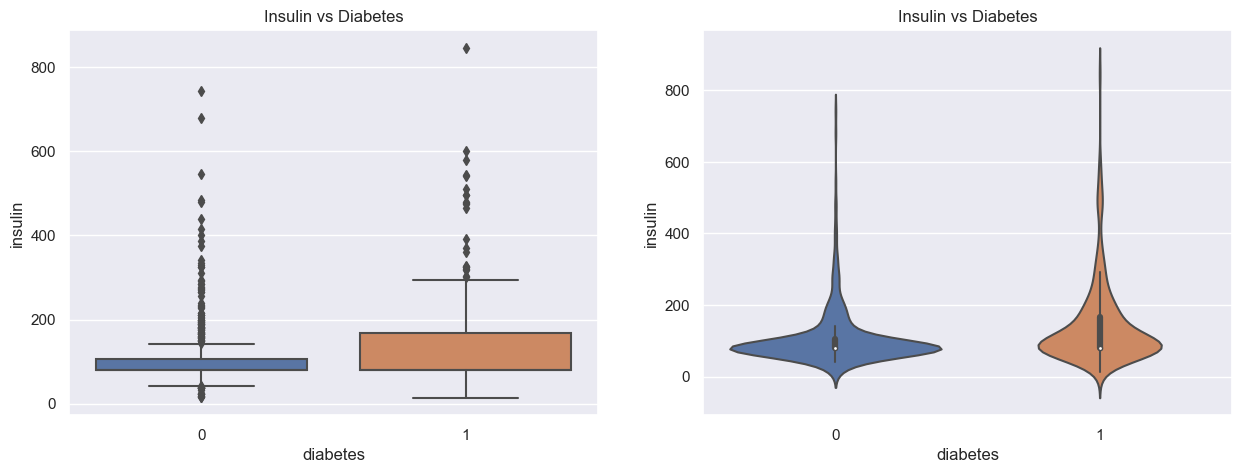

In [41]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='diabetes',y='insulin',data=data_frame,ax=ax[0]).set_title('Insulin vs Diabetes')
sns.violinplot(x='diabetes',y='insulin',data=data_frame,ax=ax[1]).set_title('Insulin vs Diabetes')

###### Insulin is a major body hormone that regulates glucose metabolism. Insulin is required for the body to efficiently use sugars, fats and proteins. Any change in insulin amount in the body would result in change glucose levels as well. Here the boxplot and violinplot shows the distribution of insulin level in patients. In non diabetic patients the insulin level is near to 100, whereas in diabetic patients the insulin level is near to 200. In the voilinplot we can see that the distribution of insulin level in non diabetic patients is more spread out near 100, whereas in diabetic patients the distribution is contracted and shows a little bit spread in higher insulin levels. This shows that the insulin level is a good indicator of diabetes.

# BMI and Diabetes

<AxesSubplot:xlabel='diabetes', ylabel='bmi'>

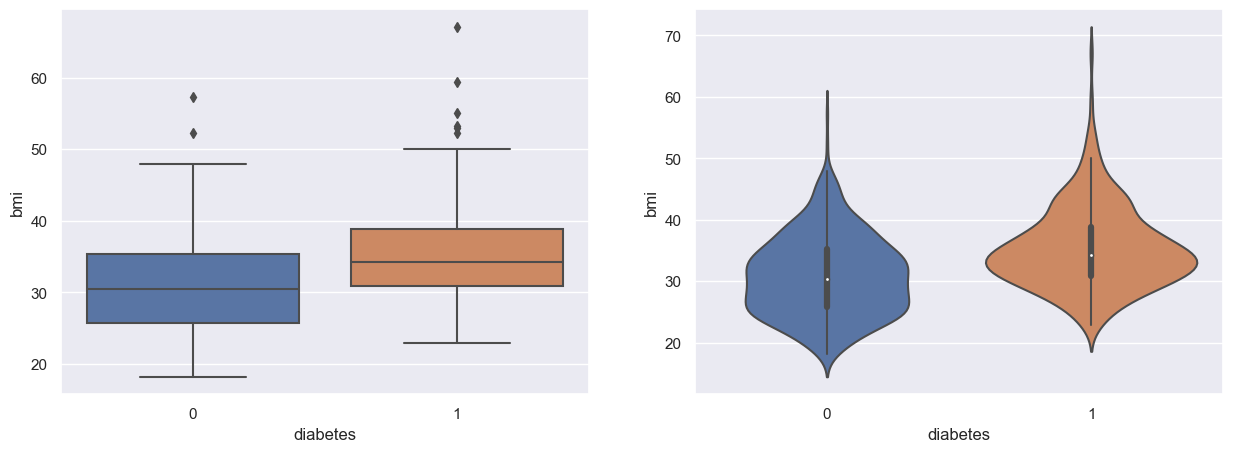

In [42]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='diabetes',y='bmi',data=data_frame,ax=ax[0])
sns.violinplot(x='diabetes',y='bmi',data=data_frame,ax=ax[1])

###### Both graphs highlights the role of BMI in diabetes prediction. Non diabetic patients have a normal BMI within the range of 25-35 whereas the diabetic patients have a BMI greater than 35. The violinplot reveals the BMI distribution, where the non dibetic patients have a increased spread from 25 to 35 with narrows after 35. However in diabetic patients there is increased spread at 35 and increased spread 45-50 as compared to non diabetic patients.Therefore BMI is a good predictor of diabetes and obese people are more likely to be diabetic.

# Diabetes Pedigree Function and Diabetes Outcome

Text(0.5, 1.0, 'Diabetes Pedigree Function')

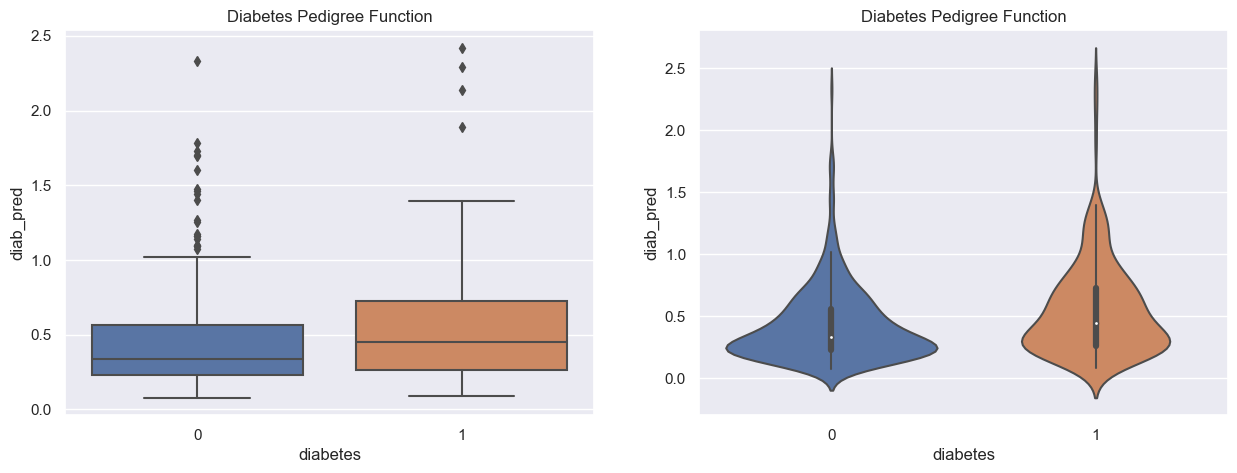

In [43]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='diabetes',y='diab_pred',data=data_frame,ax=ax[0]).set_title('Diabetes Pedigree Function')
sns.violinplot(x='diabetes',y='diab_pred',data=data_frame,ax=ax[1]).set_title('Diabetes Pedigree Function')

###### Diabetes Pedigree Function (DPF) calculates diabetes likelihood depending on the subject's age and his/her diabetic family history. From the boxplot, the patients with lower DPF, are much less likely to have diabetes. The patients with higher DPF, are much more likely to have diabetes. In the violinplot, majority of the non diabetic patients have a DPF of 0.25-0.35, whereas the diabetic patients have a increased DPF, which is shown by the their distribution in the violinplot where there is a increased spread in the DPF from 0.5 -1.5. Therefore the DPF is a good indicator of diabetes.

In [49]:
col= data_frame.columns[:]

In [50]:
col

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

# Plotting Scatterplot for all the columns

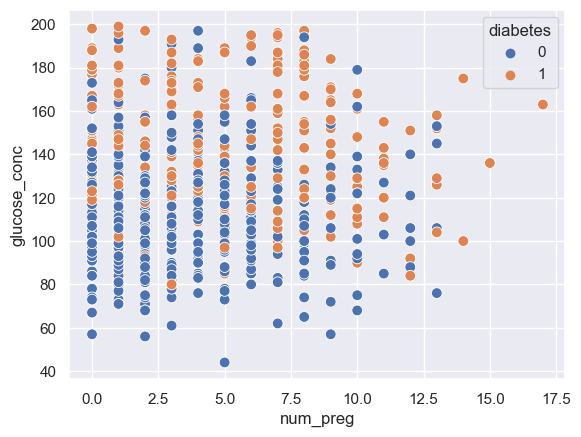

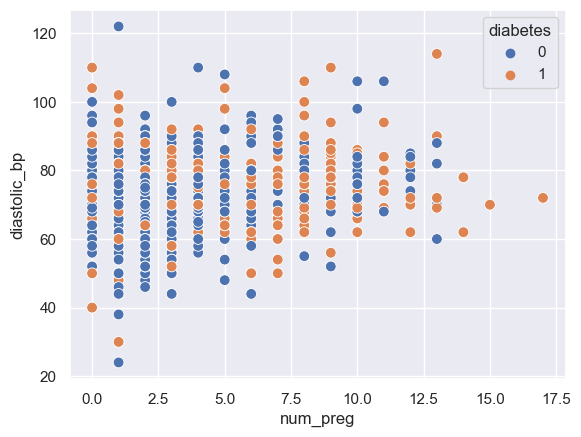

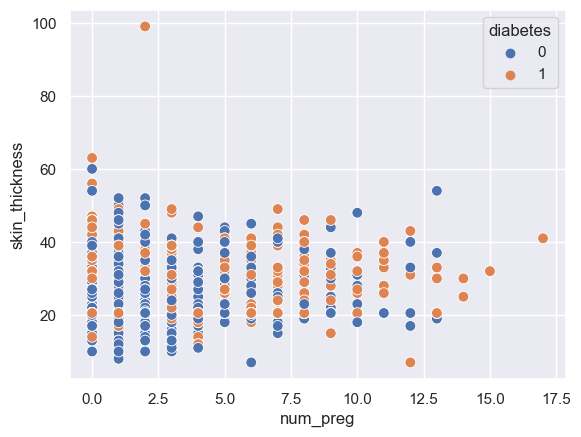

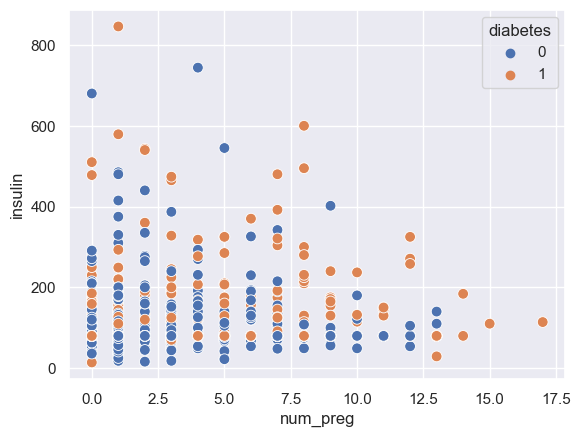

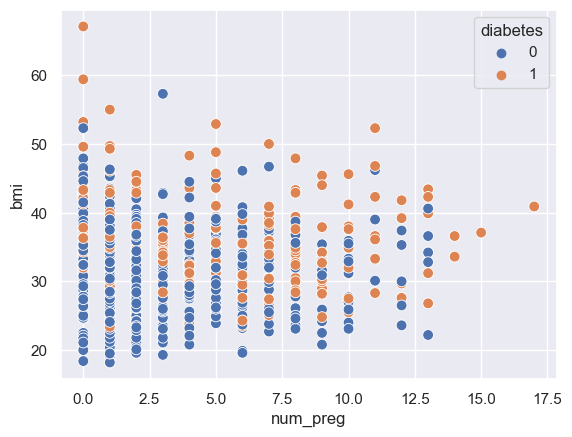

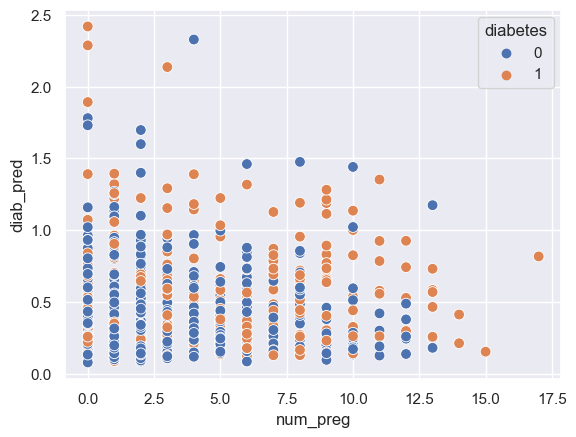

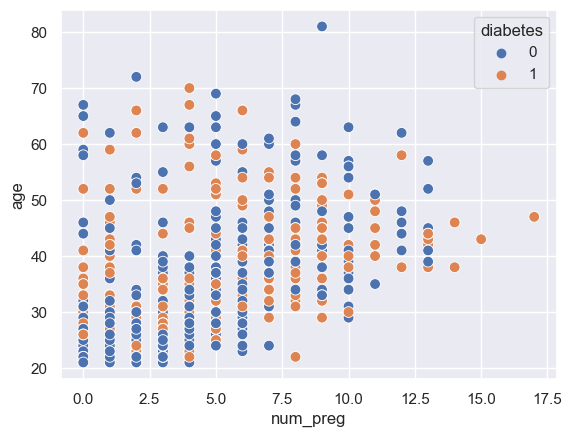

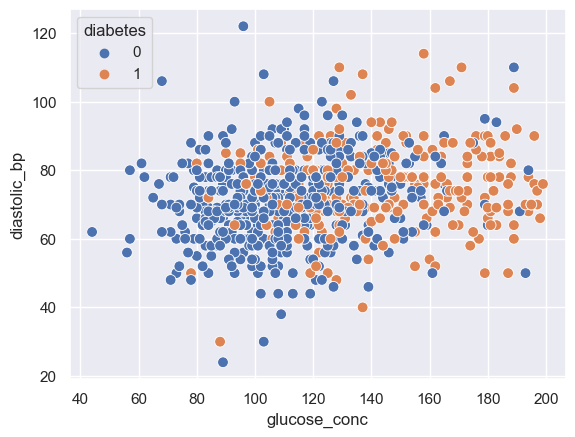

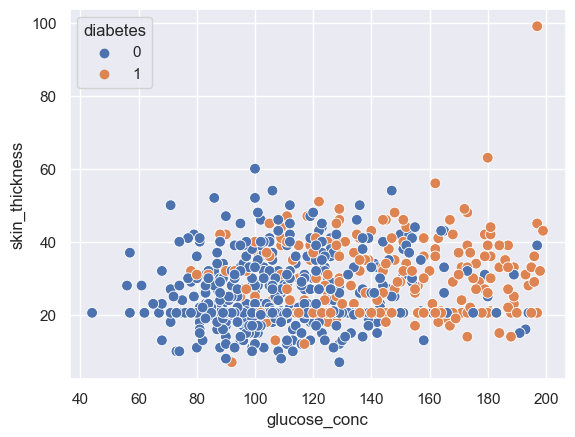

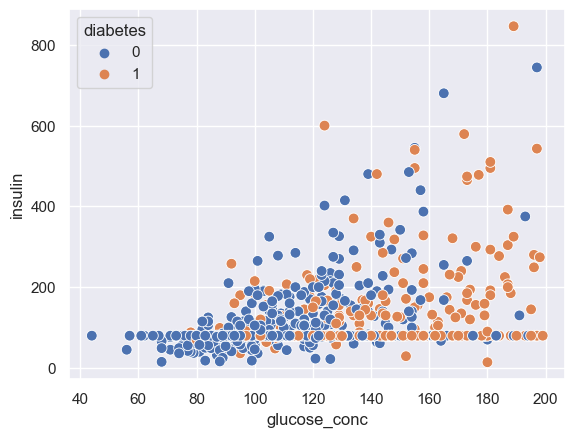

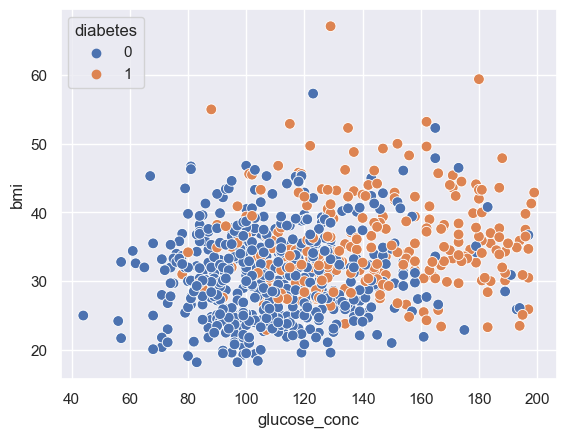

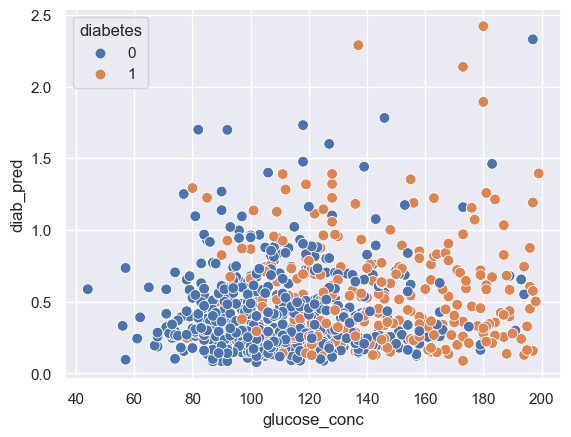

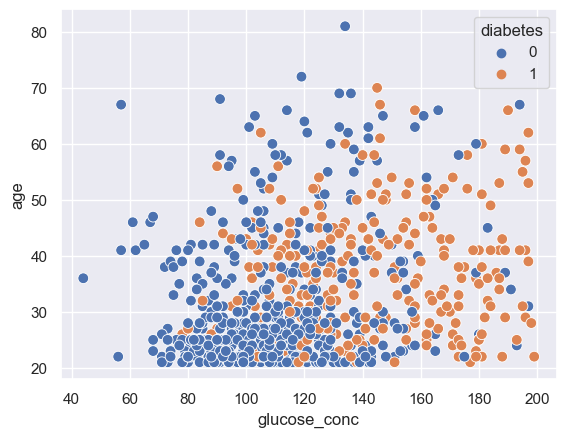

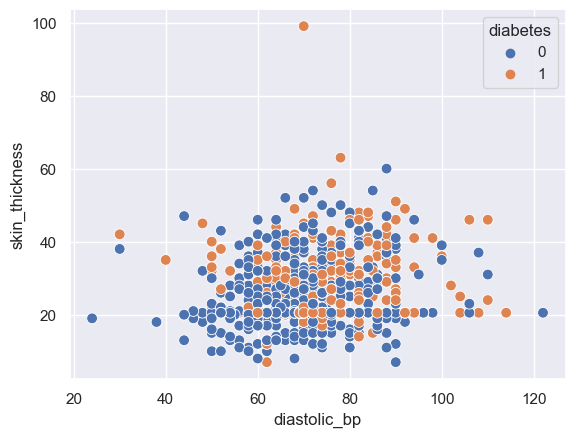

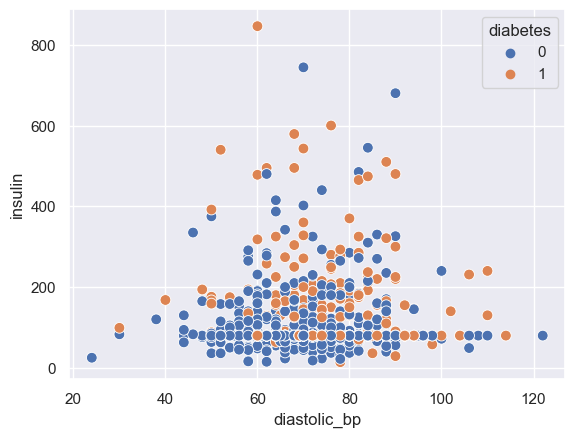

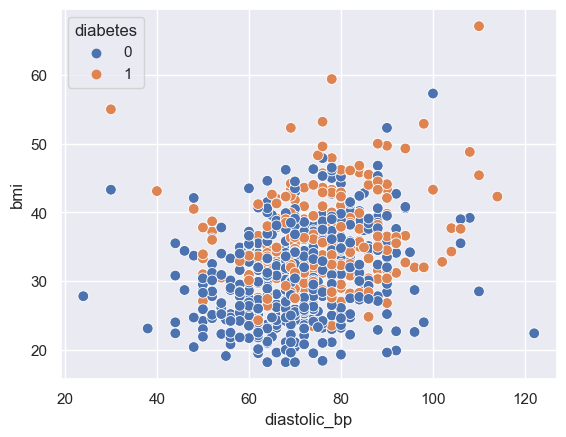

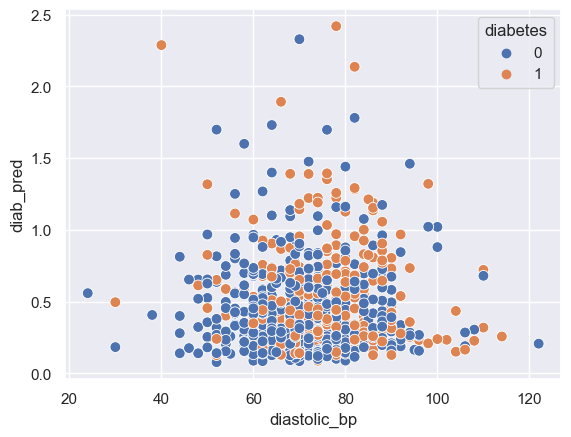

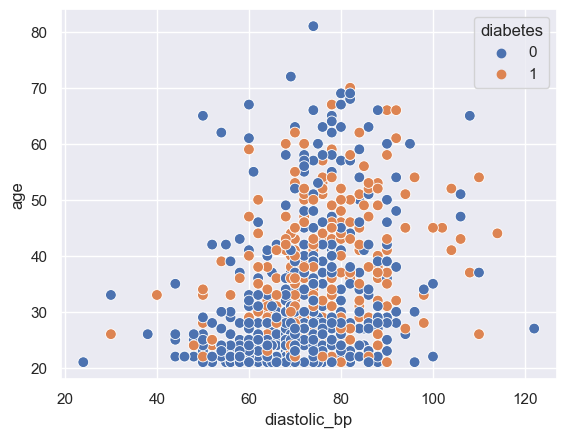

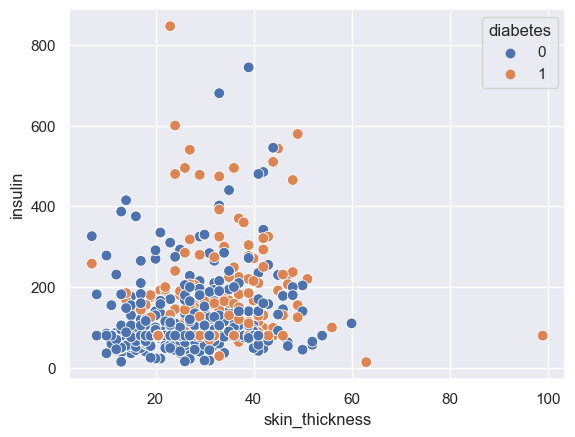

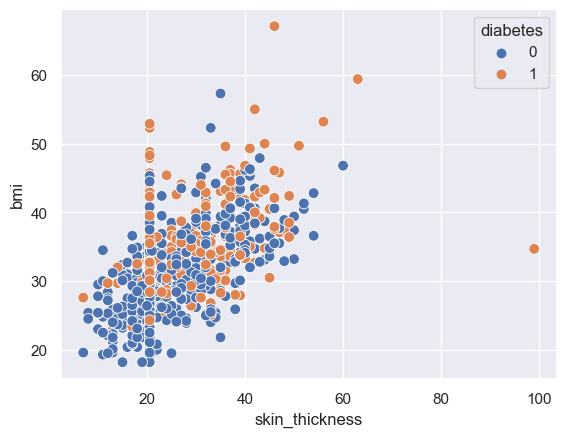

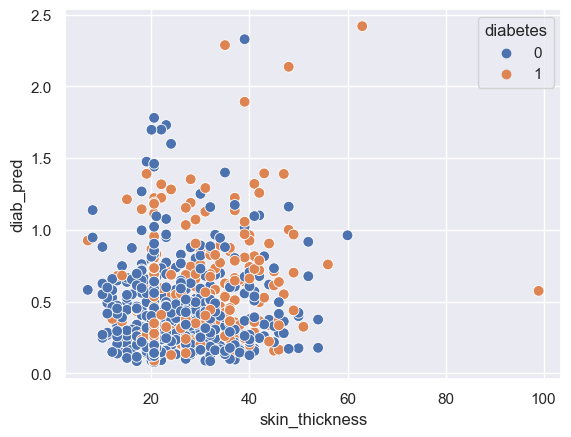

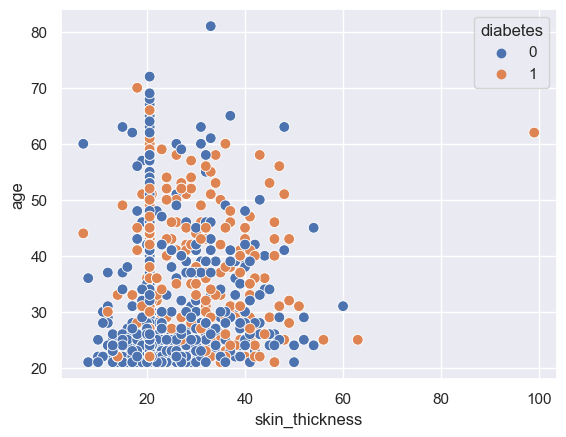

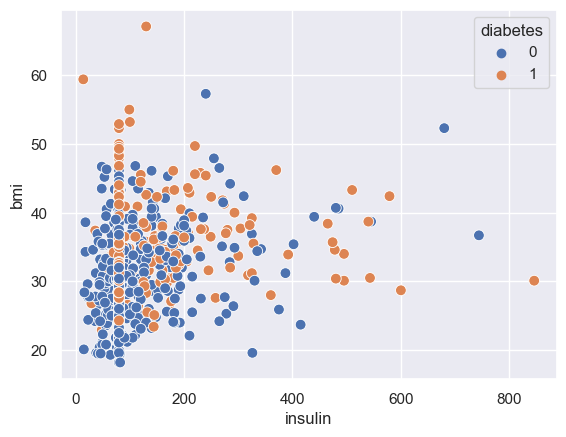

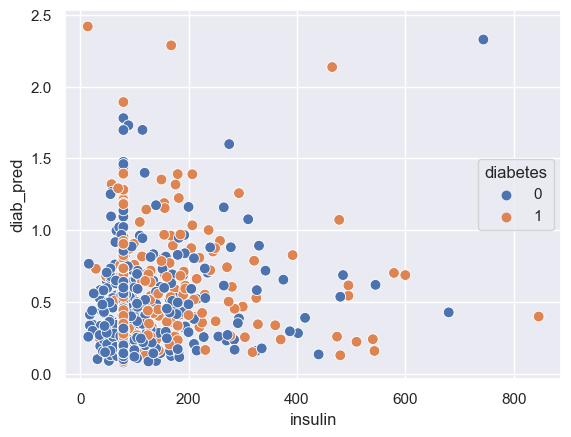

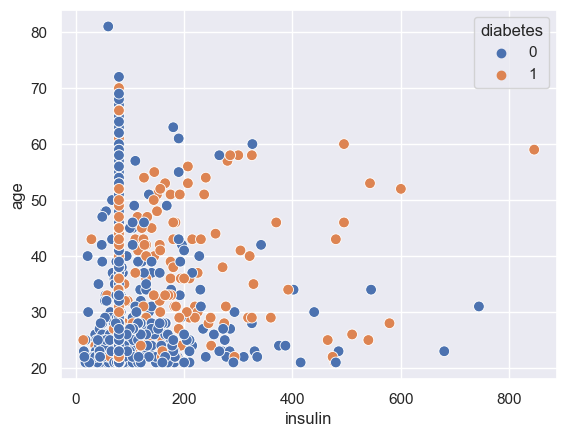

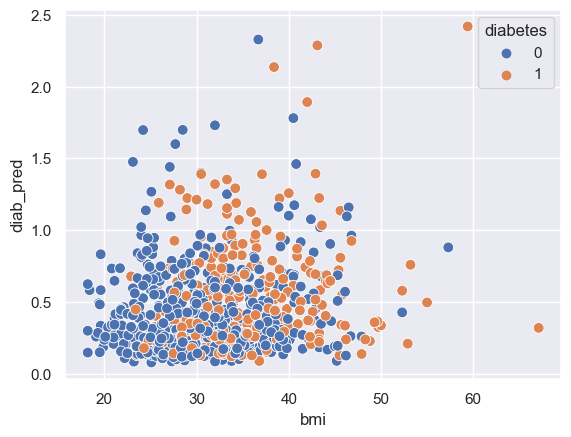

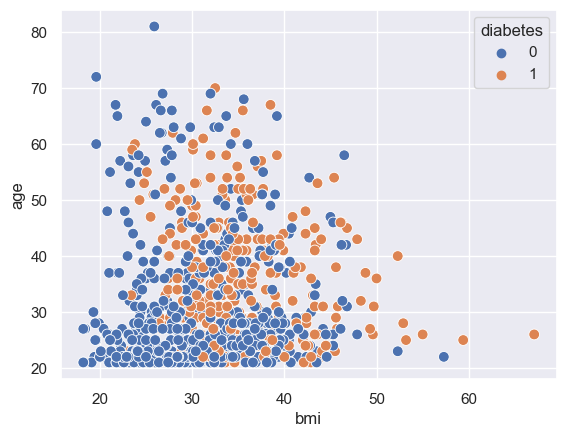

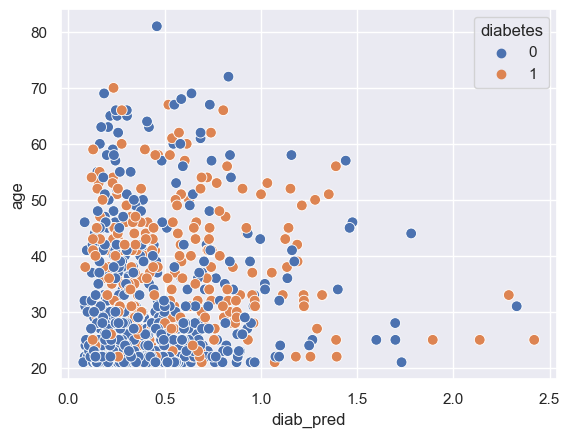

In [53]:
for i in range(len(col)):
    for j in col[i+1:]:
        if col[i]!=j and col[i]!="diabetes" and j!="diabetes":
            sns.scatterplot(x=col[i],y=j,data=data_frame,s=60,hue="diabetes")
            plt.show()
            

# Coorelation Matrix Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

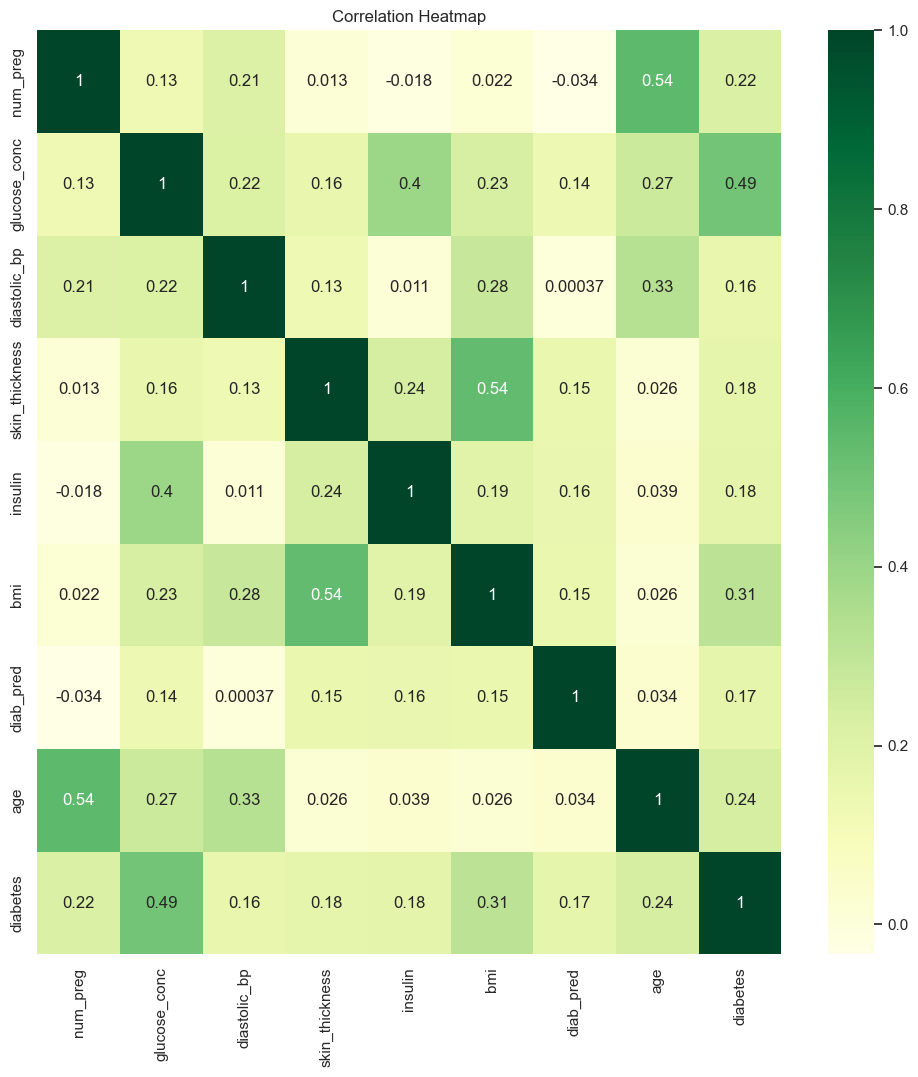

In [69]:
#correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data_frame.corr(), annot=True, cmap='YlGn').set_title('Correlation Heatmap')

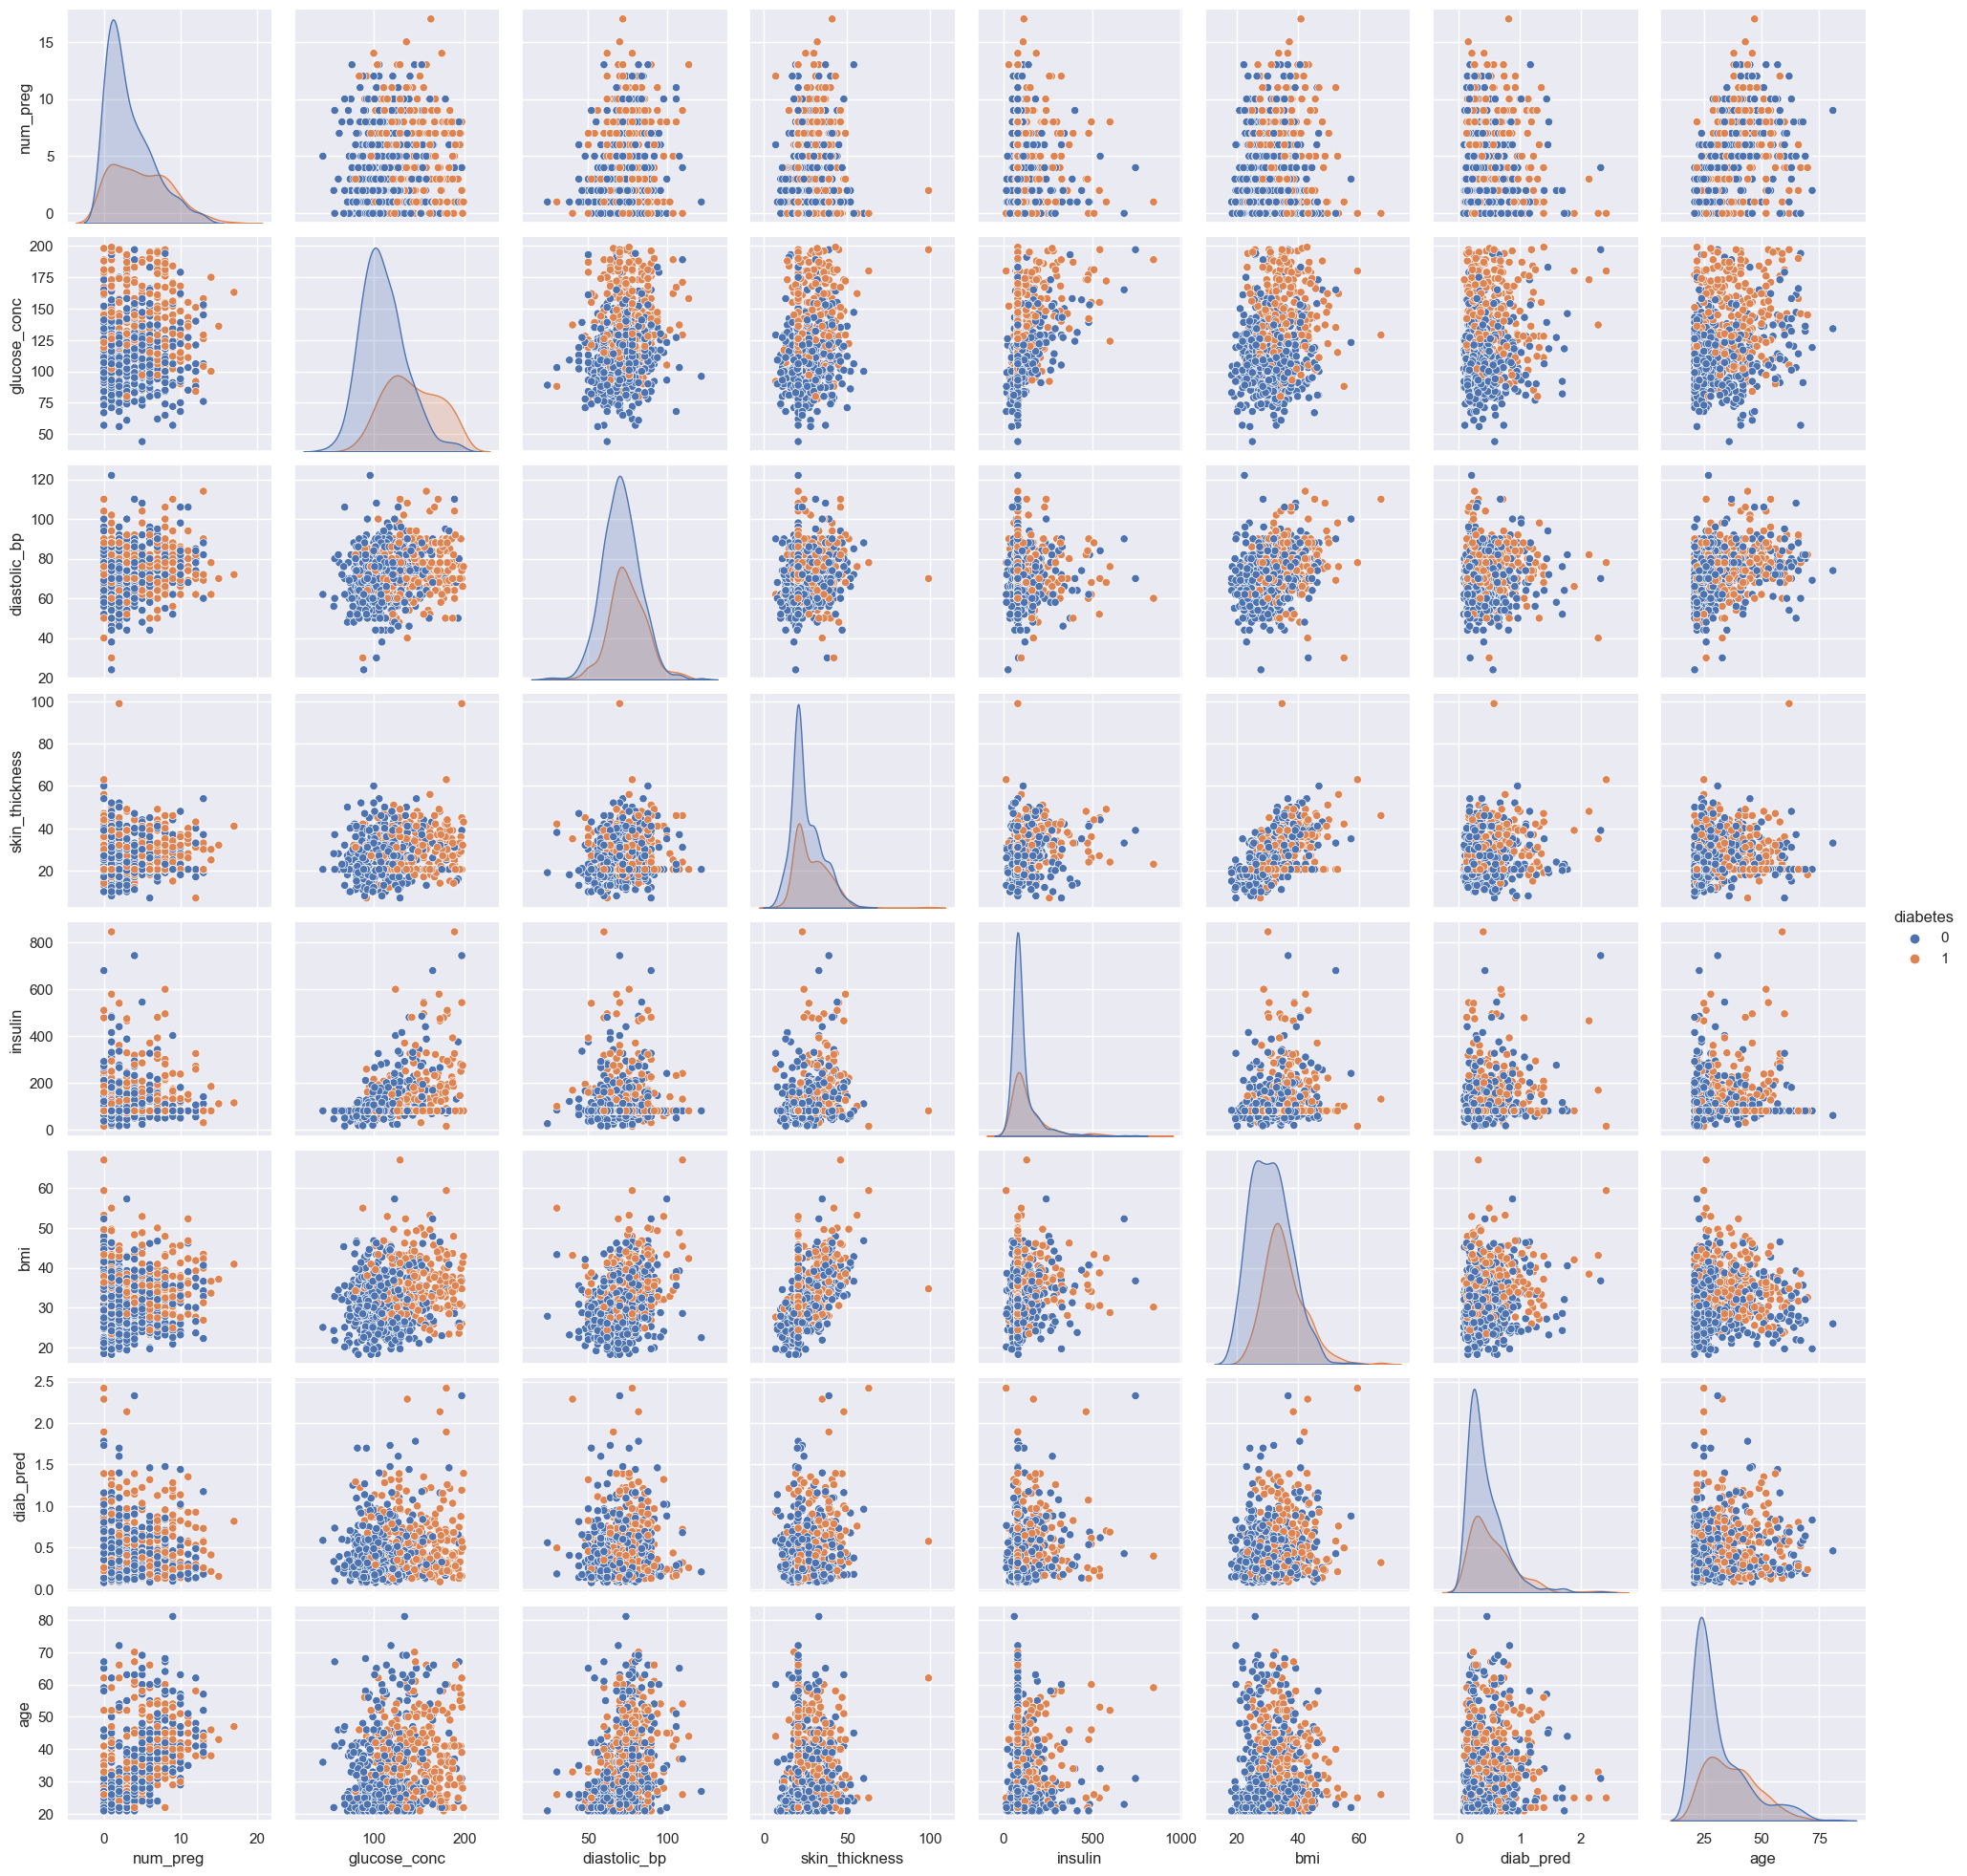

In [71]:
sns.pairplot(data_frame, hue="diabetes")

# Check class distribution

In [72]:
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['diabetes'] == 1])
num_false = len(data_frame.loc[data_frame['diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


# Spliting the data
###### 70% for training, 30% for testing

In [78]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = data_frame[feature_col_names].values     # predictor feature columns (8 X m)
y = data_frame[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything


###### We check to ensure we have the the desired 70% train, 30% test split of the data

In [82]:
trainval = (1.0 * len(X_train)) / (1.0 * len(data_frame.index))
testval = (1.0 * len(X_test)) / (1.0 * len(data_frame.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))
print("Total {0:0.2f}%".format((testval+trainval) * 100))

69.92% in training set
30.08% in test set
Total 100.00%


## Verifying predicted value was split correctly

In [83]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['diabetes'] == 1]), (len(data_frame.loc[data_frame['diabetes'] == 1])/len(data_frame.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['diabetes'] == 0]), (len(data_frame.loc[data_frame['diabetes'] == 0])/len(data_frame.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


## Training Initial Algorithm - Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

## Performance on Training Data

In [85]:
# this returns array of predicted results
prediction_from_trained_data = nb_model.predict(X_train)

In [137]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy =accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our naive bayes model is : {0:.4f}".format(accuracy))


Accuracy of our naive bayes model is : 1.0000


## Performance on Testing Data

In [141]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test)

Naive_Bayes_acc=accuracy = accuracy_score(y_test, prediction_from_test_data)

print ("Accuracy of our naive bayes model is: {0:0.4f}".format(accuracy))


Accuracy of our naive bayes model is: 0.7403


In [100]:
print ("Confusion Matrix")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))


Confusion Matrix
[[ 51  29]
 [ 31 120]]


In [101]:
print ("Classification Report")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(classification_report(y_test, prediction_from_test_data, labels=[1, 0])))


Classification Report
              precision    recall  f1-score   support

           1       0.62      0.64      0.63        80
           0       0.81      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Training Initial Algorithm - Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

## Predict Training Data

In [118]:
rf_predict_train = rf_model.predict(X_train)

#get accuracy
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 1.0000


## Predict Testing Data

In [119]:
rf_predict_test = rf_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.7403


In [123]:

print ("Confusion Matrix for Random Forest")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(classification_report(y_test, rf_predict_test, labels=[1, 0])))


Confusion Matrix for Random Forest
[[ 51  29]
 [ 31 120]]

Classification Report

              precision    recall  f1-score   support

           1       0.62      0.64      0.63        80
           0       0.81      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



# Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print ("Accuracy : {0:.4f}".format(accuracy_score(y_test, lr_predict_test)))

print ("Confusion Matrix")

print (confusion_matrix(y_test, lr_predict_test, labels=[1, 0]))

print ("")

print ("Classification Report")

print (classification_report(y_test, lr_predict_test, labels=[1, 0]));
logis_acc_testd=accuracy_score(y_test, lr_predict_test)

Accuracy : 0.7489
Confusion Matrix
[[ 48  32]
 [ 26 125]]

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.60      0.62        80
           0       0.80      0.83      0.81       151

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Regression with Cross-Validation

In [145]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  

# set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print( "Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print (confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0])) 
print ("")
print ("Classification Report")
print (classification_report(y_test, lr_cv_predict_test, labels=[1,0]))
logis_cv_acc_testd=accuracy_score(y_test, lr_cv_predict_test)

Accuracy: 0.7013
[[ 54  26]
 [ 43 108]]

Classification Report
              precision    recall  f1-score   support

           1       0.56      0.68      0.61        80
           0       0.81      0.72      0.76       151

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.68       231
weighted avg       0.72      0.70      0.71       231



# Support vector Machine

In [148]:
from sklearn.svm import SVC
# Create a RandomForestClassifier object
svm_model = SVC(kernel='linear', C=1, random_state=42)

svm_model.fit(X_train, y_train.ravel())

# this returns array of predicted results
prediction_from_trained_data = svm_model.predict(X_train)

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our SVM model is : {0:.4f}".format(accuracy))

svm_predict_test = svm_model.predict(X_test)

#get accuracy
svm_accuracy_testdata = metrics.accuracy_score(y_test, svm_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(svm_accuracy_testdata))
print ("Confusion Matrix for Support Vector Amchine")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, svm_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, svm_predict_test, labels=[1, 0])))


Accuracy of our SVM model is : 0.7784
Accuracy: 0.7403
Confusion Matrix for Support Vector Amchine
[[ 47  33]
 [ 27 124]]

Classification Report

              precision    recall  f1-score   support

           1       0.64      0.59      0.61        80
           0       0.79      0.82      0.81       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



# Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier

# create Gaussian Naive Bayes model object and train it with the data
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train.ravel())

# this returns array of predicted results
prediction_from_trained_data = dt_model.predict(X_train)
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our DT model is : {0:.4f}".format(accuracy))

dt_predict_test = dt_model.predict(X_test)

#get accuracy
dt_accuracy_testdata = metrics.accuracy_score(y_test, dt_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(dt_accuracy_testdata))

print ("Confusion Matrix for DT")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, dt_predict_test, labels=[ 1,0])))


Accuracy of our DT model is : 1.0000
Accuracy: 0.6883
Confusion Matrix for DT
[[ 52  28]
 [ 44 107]]

Classification Report

              precision    recall  f1-score   support

           1       0.54      0.65      0.59        80
           0       0.79      0.71      0.75       151

    accuracy                           0.69       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.69      0.69       231



### Comparing the models

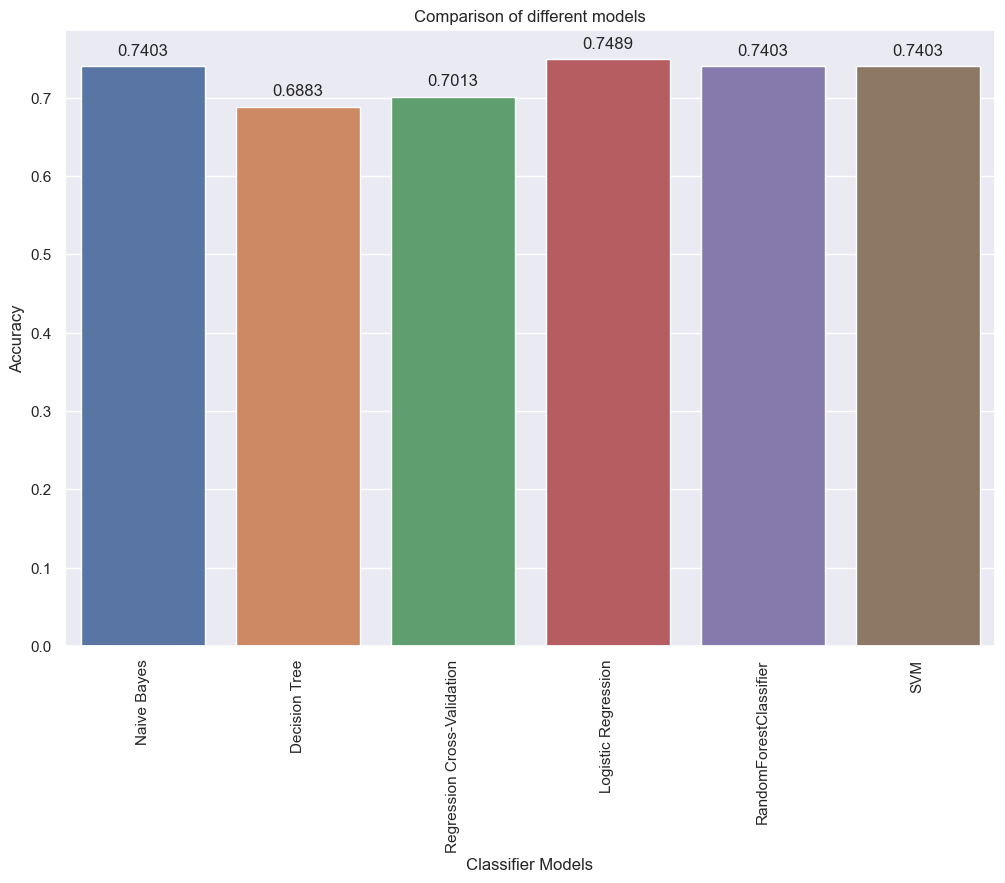

In [164]:

# Create the bar plot
plt.figure(figsize=(12,8))
sns.barplot(x=["Naive Bayes","Decision Tree","Regression Cross-Validation",'Logistic Regression', 'RandomForestClassifier', 'SVM'],
            y=[Naive_Bayes_acc,dt_accuracy_testdata,logis_cv_acc_testd,logis_acc_testd,rf_accuracy_testdata,svm_accuracy_testdata])

# Add labels on top of the bars
for i, v in enumerate([Naive_Bayes_acc,dt_accuracy_testdata,logis_cv_acc_testd,logis_acc_testd,rf_accuracy_testdata,svm_accuracy_testdata]):
    plt.text(i, v+0.01, str(round(v, 4)), ha='center', va='bottom')

plt.xlabel('Classifier Models')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.title('Comparison of different models')

# Show the plot
plt.show()


###### Logistic Regression has the best performance between all the models

In [165]:
logis_acc_testd

0.7489177489177489

In [166]:
import pickle
pickle.dump(lr_model,open('diabetes_model.pkl','wb'))